# Geo Data

In [474]:
import pandas as pd
import matplotlib.pyplot as plt
df_geocode = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_geocode.csv', sep=',')
df_geocode.head()

,Unnamed: 0,Lab Id,Address,Location,Zipcode
0,0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [475]:
df_geocode.drop_duplicates()
# não há duplicatas

,Unnamed: 0,Lab Id,Address,Location,Zipcode
0,0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0
...,...,...,...,...,...
114,114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002.0
115,115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421.0
116,116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304.0
117,117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806.0


In [476]:
df_geocode = df_geocode.drop(['Unnamed: 0'], axis=1)
df_geocode.index = range(len(df_geocode))
# remove coluna inútil

In [477]:
df_geocode.drop_duplicates(subset=['Zipcode']).index.size
# indica que há mais de um Lab por zipcode ou algumas informações de zipcode estão faltando

106

In [478]:
df_geocode = df_geocode.dropna()
# remove linhas com algum valor faltando

In [479]:
df_geocode

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0
...,...,...,...,...
114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002.0
115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421.0
116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304.0
117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806.0


In [480]:
Series = df_geocode.apply(lambda x: int(x['Zipcode']), axis=1)
# Série com Zipcode convertido de float para inteiro

In [481]:
# Devido a algum erro na inserção dos dados, dois zipcodes da filadélfia foram corrompidos.
# (Isso foi descoberto na criação da tabela Labs, mais a frente)
# Esse problema pode ser solucionado com atualização manual dos dados:
Series[5] = 19134 # no lugar de 9134
Series[60] = 19107 # no lugar de 9107

In [482]:
df_geocode = df_geocode.drop(columns=['Zipcode'])
df_geocode.insert(3, 'ZCTA5', Series)
# cria nova coluna de mesmo nome da coluna da tabela df_econ_data com inteiros

In [483]:
df_geocode

,Lab Id,Address,Location,ZCTA5
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469
...,...,...,...,...
114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002
115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421
116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304
117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806


In [484]:
df_geocode.to_csv('df_geocode_NEW.csv', index=False)
# salva novo arquivo

In [485]:
df_geocode = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_geocode_NEW.csv', sep=',')
df_geocode.head()

,Lab Id,Address,Location,ZCTA5
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469


# Demo Data

In [416]:
df_demo_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\DemographicData_ZCTAs.csv', sep=',')
df_demo_data.head()

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [417]:
df_demo_data = df_demo_data.drop(['Unnamed: 0'], axis=1)
# remove coluna inútil

In [418]:
df_demo_data

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,8600000US00982,ZCTA5 00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,8600000US00983,ZCTA5 00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,8600000US00985,ZCTA5 00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


In [419]:
Series = df_demo_data.apply(lambda x: x['GeographicAreaName'][6:], axis=1)
df_demo_data.insert(2, 'ZCTA5', Series)
# cria coluna com ZCTA5 na mesma forma que demais tabelas 

In [420]:
df_demo_data

,Id,GeographicAreaName,ZCTA5,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,00979,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,8600000US00982,ZCTA5 00982,00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,8600000US00983,ZCTA5 00983,00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,8600000US00985,ZCTA5 00985,00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


In [421]:
mapping = {}
new_names = ['SexRatio_Mper100F']
mapping[df_demo_data.columns[4]] = new_names[0]
df_demo_data = df_demo_data.rename(columns=mapping)
# renomeia coluna de sex ratio

In [422]:
df_demo_data

,Id,GeographicAreaName,ZCTA5,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,00979,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,8600000US00982,ZCTA5 00982,00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,8600000US00983,ZCTA5 00983,00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,8600000US00985,ZCTA5 00985,00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


In [423]:
df_demo_data.to_csv('df_demo_data_NEW.csv', index = False)
# salva novo arquivo

In [424]:
df_demo_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_demo_data_NEW.csv', sep=',')
df_demo_data.head()

,Id,GeographicAreaName,ZCTA5,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


# Econ Data

In [428]:
df_econ_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_econ_data_NEW.csv', sep=',')
df_econ_data.head()

,id,GeoAreaName,ZCTA5,TotalHouseholds_Below10k,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,198,71,298,513,647,1117,529,945,245,61,4624
1,8600000US35005,ZCTA5 35005,35005,188,184,318,293,353,562,299,407,67,26,2697
2,8600000US35006,ZCTA5 35006,35006,71,20,117,104,154,176,124,194,51,7,1018
3,8600000US35007,ZCTA5 35007,35007,396,208,670,462,1173,1854,1578,2224,473,254,9292
4,8600000US35010,ZCTA5 35010,35010,700,610,1093,957,1056,1512,807,749,254,249,7987


In [429]:
df_econ_data.to_csv('df_econ_data_NEW.csv', index = False)
# salva novo arquivo

In [430]:
df_econ_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_econ_data_NEW.csv', sep=',')
df_econ_data.head()

,id,GeoAreaName,ZCTA5,TotalHouseholds_Below10k,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,198,71,298,513,647,1117,529,945,245,61,4624
1,8600000US35005,ZCTA5 35005,35005,188,184,318,293,353,562,299,407,67,26,2697
2,8600000US35006,ZCTA5 35006,35006,71,20,117,104,154,176,124,194,51,7,1018
3,8600000US35007,ZCTA5 35007,35007,396,208,670,462,1173,1854,1578,2224,473,254,9292
4,8600000US35010,ZCTA5 35010,35010,700,610,1093,957,1056,1512,807,749,254,249,7987


# Criando um arquivo unificado para ZCTA
### Primeira parte

In [431]:
new_columns = list(df_econ_data.columns)[3:]

In [432]:
for i in range(0, len(new_columns)):
    Series = df_econ_data.apply(lambda x: x[new_columns[i]], axis=1)
    df_demo_data.insert(19 + i, new_columns[i], Series)
# Adiciona colunas de df_econ_data em df_demo_data

In [433]:
df_demo_data.to_csv('df_ZCTA_uni_data_PARTIAL.csv', index=False)
# salva novo arquivo com o nome de df_ZCTA_uni_data_PARTIAL

In [434]:
df_econ_data_uni = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_ZCTA_uni_data_PARTIAL.csv', sep=',')
df_econ_data_uni.head()

,Id,GeographicAreaName,ZCTA5,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,...,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,12045,94.1,805,1075,898,477,578,...,71.0,298.0,513.0,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0
1,8600000US35005,ZCTA5 35005,35005,7344,86.1,504,453,511,499,214,...,184.0,318.0,293.0,353.0,562.0,299.0,407.0,67.0,26.0,2697.0
2,8600000US35006,ZCTA5 35006,35006,2883,108.2,96,153,303,129,156,...,20.0,117.0,104.0,154.0,176.0,124.0,194.0,51.0,7.0,1018.0
3,8600000US35007,ZCTA5 35007,35007,26332,95.0,1936,1992,1837,1762,1376,...,208.0,670.0,462.0,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0
4,8600000US35010,ZCTA5 35010,35010,20613,90.5,1306,1465,944,1217,1128,...,610.0,1093.0,957.0,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0


In [435]:
df_econ_data_uni

,Id,GeographicAreaName,ZCTA5,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,...,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,12045,94.1,805,1075,898,477,578,...,71.0,298.0,513.0,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0
1,8600000US35005,ZCTA5 35005,35005,7344,86.1,504,453,511,499,214,...,184.0,318.0,293.0,353.0,562.0,299.0,407.0,67.0,26.0,2697.0
2,8600000US35006,ZCTA5 35006,35006,2883,108.2,96,153,303,129,156,...,20.0,117.0,104.0,154.0,176.0,124.0,194.0,51.0,7.0,1018.0
3,8600000US35007,ZCTA5 35007,35007,26332,95.0,1936,1992,1837,1762,1376,...,208.0,670.0,462.0,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0
4,8600000US35010,ZCTA5 35010,35010,20613,90.5,1306,1465,944,1217,1128,...,610.0,1093.0,957.0,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,979,16130,91.6,402,532,554,726,1005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33116,8600000US00982,ZCTA5 00982,982,14346,81.0,431,952,795,769,854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33117,8600000US00983,ZCTA5 00983,983,33947,81.4,1833,1589,1841,2203,2957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33118,8600000US00985,ZCTA5 00985,985,31682,82.4,1171,1427,1833,2304,2032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Segunda parte

In [436]:
df_geocode

,Lab Id,Address,Location,ZCTA5
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469
...,...,...,...,...
113,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002
114,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421
115,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304
116,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806


In [437]:
df_geocode.drop_duplicates(subset=['ZCTA5'])

,Lab Id,Address,Location,ZCTA5
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469
...,...,...,...,...
112,L071,"9633 LEVIN RD NW 202, SILVERDALE, WA 98383","47.6516517,-122.687053",98383
113,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002
114,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421
115,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304


In [438]:
Lab_Series = {}

In [439]:
for index, row in df_econ_data_uni.iterrows():
    zcta = row['ZCTA5']
    Lab_Series[index] = []
    for index2, row2 in df_geocode.iterrows():
        if row2['ZCTA5'] == zcta:
            Lab_Series[index].append(row2['Lab Id'])
# Cria uma série que será uma nova coluna na tabela completa.
# Esta coluna contém todos os laboratórios localizados no ZCTA de suas linhas.

In [440]:
Lab_Series_column = pd.Series(data=Lab_Series, index=list(Lab_Series.keys()))
df_econ_data_uni.insert(3, 'Labs', Lab_Series_column)
# Coluna com todos os laboratórios localizados no ZCTA de suas linhas adicionada

In [441]:
df_econ_data_uni

,Id,GeographicAreaName,ZCTA5,Labs,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,...,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,[],12045,94.1,805,1075,898,477,...,71.0,298.0,513.0,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0
1,8600000US35005,ZCTA5 35005,35005,[],7344,86.1,504,453,511,499,...,184.0,318.0,293.0,353.0,562.0,299.0,407.0,67.0,26.0,2697.0
2,8600000US35006,ZCTA5 35006,35006,[],2883,108.2,96,153,303,129,...,20.0,117.0,104.0,154.0,176.0,124.0,194.0,51.0,7.0,1018.0
3,8600000US35007,ZCTA5 35007,35007,[],26332,95.0,1936,1992,1837,1762,...,208.0,670.0,462.0,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0
4,8600000US35010,ZCTA5 35010,35010,[],20613,90.5,1306,1465,944,1217,...,610.0,1093.0,957.0,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,979,[],16130,91.6,402,532,554,726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33116,8600000US00982,ZCTA5 00982,982,[],14346,81.0,431,952,795,769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33117,8600000US00983,ZCTA5 00983,983,[],33947,81.4,1833,1589,1841,2203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33118,8600000US00985,ZCTA5 00985,985,[],31682,82.4,1171,1427,1833,2304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [442]:
Eligible = {}
for index, row in df_econ_data_uni.iterrows():  
    if len(row['Labs']) == 0:
        Eligible[index] = 1
    else:
        Eligible[index] = 0
# Código para descobrir quais ZCTAs são elegíveis para novas unidades

In [443]:
Eligible_column = pd.Series(data=Eligible, index=list(Eligible.keys()))
df_econ_data_uni.insert(4, 'Eligible', Eligible_column)
# Adiciona a informação anterior à tabela

In [444]:
df_econ_data_uni.to_csv('df_ZCTA_uni_data_PARTIAL.csv', index = False)
# salva novo arquivo

In [445]:
df_econ_data_uni = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_ZCTA_uni_data_PARTIAL.csv', sep=',')
df_econ_data_uni.head()

,Id,GeographicAreaName,ZCTA5,Labs,Eligible,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,...,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,[],1,12045,94.1,805,1075,898,...,71.0,298.0,513.0,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0
1,8600000US35005,ZCTA5 35005,35005,[],1,7344,86.1,504,453,511,...,184.0,318.0,293.0,353.0,562.0,299.0,407.0,67.0,26.0,2697.0
2,8600000US35006,ZCTA5 35006,35006,[],1,2883,108.2,96,153,303,...,20.0,117.0,104.0,154.0,176.0,124.0,194.0,51.0,7.0,1018.0
3,8600000US35007,ZCTA5 35007,35007,[],1,26332,95.0,1936,1992,1837,...,208.0,670.0,462.0,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0
4,8600000US35010,ZCTA5 35010,35010,[],1,20613,90.5,1306,1465,944,...,610.0,1093.0,957.0,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0


# Finalizando Transactions
Criação de df_transac_data_NEW

In [232]:
df_transactions_partial = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_transac_data_PARTIAL.csv', sep=',')
df_transactions_partial.head()

,Patient Id,Gender,Date_Of_Birth,Date_of_service,PatientAgeUponTesting,Service Id,Lab Id,CodItem,Testing_Cost
0,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000224,10.0


In [233]:
df_test_data = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_test_data_NEW.csv', sep=',')
df_test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [237]:
Series = df_transactions_partial.apply(lambda row: df_test_data[df_test_data['CodItem'] == row['CodItem']].size, raw=True, axis=1)
# Verifica se todos os codItem da tabela transac têm um equivalente na tabela tests

In [238]:
Series.value_counts()
# Há linhas de transactional_data em que CodItem não existe na tabela test_data. Estas linhas precisam
# ser removidas.

6    2300119
0        284
dtype: int64

In [242]:
for index, value in Series.iteritems():
    if value == 0:
        df_transactions_partial = df_transactions_partial.drop([index])

df_transactions_partial.index = range(len(df_transactions_partial))
# Remove linhas com CodItem sem equivalente na tabela test_data

In [244]:
df_transactions_partial.to_csv('df_transac_data_PARTIAL2.csv', index = False)
# salva novo arquivo

In [247]:
import sys
!{sys.executable} -m pip install "tqdm>=4.9.0"
# baixa uma biblioteca para tracking de progresso de operações no pandas

In [248]:
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())
# import da biblioteca para tracking de progresso

0it [00:00, ?it/s]
C:\Users\spide\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
2300119it [21:42, 1765.38it/s]


0          6
1          6
2          6
3          6
4          6
          ..
2300114    6
2300115    6
2300116    6
2300117    6
2300118    6
Length: 2300119, dtype: int64

In [249]:
df_transactions_partial['Op_Cost'] = df_transactions_partial.progress_apply(lambda row: df_test_data[df_test_data['CodItem'] == row['CodItem']]['Testing Cost'].values[0], raw=True, axis=1)
# Adiciona em todas as linhas de transação o custo operacional do exame

100%|██████████████████████████████████████████████████████████████████████| 2300119/2300119 [22:13<00:00, 1724.83it/s]


In [251]:
df_transactions_partial['Profit'] = df_transactions_partial.progress_apply(lambda row: row['Testing_Cost'] - row['Op_Cost'], raw=True, axis=1)
# Adiciona uma nova coluna com o lucro obtido em cada exame

100%|█████████████████████████████████████████████████████████████████████| 2300119/2300119 [00:54<00:00, 41827.32it/s]


In [253]:
df_transactions_partial.to_csv('df_transac_data_NEW.csv', index = False)
# salva novo arquivo final de transações

In [264]:
df_transac_data_new = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_transac_data_NEW.csv', sep=',')
df_transac_data_new.head()

,Patient Id,Gender,Date_Of_Birth,Date_of_service,PatientAgeUponTesting,Service Id,Lab Id,CodItem,Testing_Cost,Op_Cost,Profit
0,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70003237,9.0,1.78,7.22
1,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000638,13.0,2.46,10.54
2,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70001597,49.0,2.11,46.89
3,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000103,11.0,0.80,10.20
4,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000224,10.0,1.02,8.98


# Criação da tabela de Laboratórios

In [447]:
df_labs = pd.DataFrame()
# criação do data_frame com informações sobre os laboratórios

In [448]:
df_labs['Lab_Id'] = df_geocode['Lab Id']

In [449]:
df_labs

,Lab_Id
0,L152
1,L520
2,L141
3,L524
4,L545
...,...
113,L886
114,L535
115,L723
116,L163


In [450]:
df_transac_data_new.head()

,Patient Id,Gender,Date_Of_Birth,Date_of_service,PatientAgeUponTesting,Service Id,Lab Id,CodItem,Testing_Cost,Op_Cost,Profit
0,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70003237,9.0,1.78,7.22
1,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000638,13.0,2.46,10.54
2,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70001597,49.0,2.11,46.89
3,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000103,11.0,0.80,10.20
4,10210830256-BIO003,F,1976-08-01,2019-01-07,42,571904533475-38,L133,70000224,10.0,1.02,8.98


In [452]:
df_labs['Total_Profit'] = df_labs.progress_apply(lambda row: df_transac_data_new[df_transac_data_new['Lab Id'] == row[0]]['Profit'].sum(), raw=True, axis=1)
# Adiciona uma nova coluna com o lucro total obtido no laboratório

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [00:14<00:00,  7.89it/s]


In [453]:
df_labs

,Lab_Id,Total_Profit
0,L152,3724757.32
1,L520,503187.64
2,L141,1683849.05
3,L524,325025.36
4,L545,78956.93
...,...,...
113,L886,344713.80
114,L535,147429.55
115,L723,53305.69
116,L163,407396.93


In [454]:
df_labs['Total_No_Patients'] = df_labs.progress_apply(lambda row: df_transac_data_new[df_transac_data_new['Lab Id'] == row[0]].index.size, raw=True, axis=1)
# Adiciona uma nova coluna com o número total de pacientes que foram na clínica

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [00:15<00:00,  7.58it/s]


In [455]:
df_labs

,Lab_Id,Total_Profit,Total_No_Patients
0,L152,3724757.32,93906
1,L520,503187.64,20140
2,L141,1683849.05,50037
3,L524,325025.36,12862
4,L545,78956.93,2753
...,...,...,...
113,L886,344713.80,10202
114,L535,147429.55,4969
115,L723,53305.69,2233
116,L163,407396.93,11575


In [456]:
df_labs['ZCTA5'] = df_geocode['ZCTA5'] 
# Adiciona ZCTA5 aos labs

In [457]:
df_geocode.head(6)

,Lab Id,Address,Location,ZCTA5
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469
5,L158,"3400 ARAMINGO AVE STE 4, PHILADELPHIA, PA 19134\n","39.9924717,-75.1035442",19134


In [458]:
df_labs.head(6)

,Lab_Id,Total_Profit,Total_No_Patients,ZCTA5
0,L152,3724757.32,93906,30096
1,L520,503187.64,20140,13440
2,L141,1683849.05,50037,98034
3,L524,325025.36,12862,30342
4,L545,78956.93,2753,61469
5,L158,1296969.50,45709,19134


In [460]:
df_demo_data.head()

,Id,GeographicAreaName,ZCTA5,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,...,TotalHouseholds_10to15k,TotalHouseholds_15to25k,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds
0,8600000US35004,ZCTA5 35004,35004,12045,94.1,805,1075,898,477,578,...,71.0,298.0,513.0,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0
1,8600000US35005,ZCTA5 35005,35005,7344,86.1,504,453,511,499,214,...,184.0,318.0,293.0,353.0,562.0,299.0,407.0,67.0,26.0,2697.0
2,8600000US35006,ZCTA5 35006,35006,2883,108.2,96,153,303,129,156,...,20.0,117.0,104.0,154.0,176.0,124.0,194.0,51.0,7.0,1018.0
3,8600000US35007,ZCTA5 35007,35007,26332,95.0,1936,1992,1837,1762,1376,...,208.0,670.0,462.0,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0
4,8600000US35010,ZCTA5 35010,35010,20613,90.5,1306,1465,944,1217,1128,...,610.0,1093.0,957.0,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0


In [468]:
df_labs['Total_Population_of_ZCTA'] = df_labs.progress_apply(lambda row: df_demo_data[df_demo_data['ZCTA5'] == row[3]]['TotalPopulation'].sum(), raw=True, axis=1)
# Adiciona uma nova coluna com a população total no ZCTA da clínica

100%|██████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 1391.51it/s]


In [470]:
df_labs['Profit_Per_Inhabitant'] = df_labs.progress_apply(lambda row: row['Total_Profit']/row['Total_Population_of_ZCTA'], raw=True, axis=1)
# Adiciona uma nova coluna com o lucro por habitante daquele ZCTA

100%|█████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 29570.88it/s]


In [471]:
df_labs

,Lab_Id,Total_Profit,Total_No_Patients,ZCTA5,Total_Population_of_ZCTA,Profit_Per_Inhabitant
0,L152,3724757.32,93906,30096,68691,54.224823
1,L520,503187.64,20140,13440,41014,12.268680
2,L141,1683849.05,50037,98034,43471,38.734997
3,L524,325025.36,12862,30342,30873,10.527819
4,L545,78956.93,2753,61469,2213,35.678685
...,...,...,...,...,...,...
113,L886,344713.80,10202,8002,22964,15.011052
114,L535,147429.55,4969,13421,13149,11.212225
115,L723,53305.69,2233,13304,1617,32.965795
116,L163,407396.93,11575,52806,28288,14.401758


In [488]:
df_labs.to_csv('df_labs_PARTIAL.csv', index = False)
# salva novo arquivo final de transações

# Análise dos Melhores Laboratórios
Análise por meio de clusterização e manipulação dos dados para descobrir quais laboratórios obtiveram maior sucesso (tanto em lucro quanto em fidelização)

In [492]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np

In [816]:
df_labs = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\df_labs_PARTIAL.csv', sep=',')
df_labs.head()

,Lab_Id,Total_Profit,Total_No_Patients,ZCTA5,Total_Population_of_ZCTA,Profit_Per_Inhabitant
0,L152,3724757.32,93906,30096,68691,54.224823
1,L520,503187.64,20140,13440,41014,12.268680
2,L141,1683849.05,50037,98034,43471,38.734997
3,L524,325025.36,12862,30342,30873,10.527819
4,L545,78956.93,2753,61469,2213,35.678685


In [817]:
df_labs.iloc[96: 101]

,Lab_Id,Total_Profit,Total_No_Patients,ZCTA5,Total_Population_of_ZCTA,Profit_Per_Inhabitant
96,L058,844850.57,37936,19148,52259,16.166604
97,L703,385063.87,14622,94583,35231,10.929689
98,L664,1748257.52,47557,2169,56523,30.930020
99,L698,45774.31,1912,98104,14522,3.152067
100,L763,101501.51,4190,13090,29869,3.398223


In [819]:
df_labs['Unique_Patients'] = df_labs.progress_apply(
    lambda row: df_transac_data_new[df_transac_data_new['Lab Id'] == row['Lab_Id']].drop_duplicates('Patient Id').index.size,
    raw=False, axis=1)
# Adiciona uma nova coluna com o número pacientes únicos

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [00:15<00:00,  7.49it/s]


In [820]:
df_labs['Tests_Per_Patient'] = df_labs.progress_apply(
    lambda row: row['Total_No_Patients']/(1 + row['Unique_Patients']),
    raw=False, axis=1)
# Adiciona uma nova coluna com o número de testes feitos por paciente (total de testes/pacientes únicos)
# Funciona como uma forma de quantificar a fidelização dos clientes

100%|█████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 10714.58it/s]


In [821]:
tot_prof_whole = np.array(df_labs['Total_Profit'])
prof_pi_whole = np.array(df_labs['Profit_Per_Inhabitant'])
tot_prof, prof_pi = preprocessing.normalize([tot_prof_whole, prof_pi_whole])
tot_prof = np.array([6*i for i in tot_prof])
tests_pp = np.array(df_labs['Tests_Per_Patient'])
# Normalização dos vetores Total_Profit e Profit_Per_Inhabitant

In [822]:
Data = {'Total_Profit_Normalized': tot_prof, 
        'Tests_Per_Patient': tests_pp
       }
  
df = pd.DataFrame(Data)
dfk = pd.DataFrame(Data)

kmeans = KMeans(n_clusters=4).fit(df) # CLUSTERIZAÇÃO

df['cluster'] = kmeans.labels_.astype(int)
df['Lab_Id'] = df_labs['Lab_Id']
df['ZCTA5'] = df_labs['ZCTA5']
df['Total_Profit_Whole'] = tot_prof_whole
df['Profit_Per_Inhabitant_Whole'] = prof_pi_whole
df['Tests_Per_Patient'] = df_labs['Tests_Per_Patient']
# CLUSTERIZAÇÃO dos Laboratórios. Os laboratórios foram agrupados de acordo com o lucro total obtido
# e o número de testes realizados por paciente. A escolha de 4 clusters será justificada.

In [824]:
import seaborn as sns
palette = sns.color_palette('deep', 4)
colors = []
for i in kmeans.labels_:
    if i == 0:
        colors.append(palette[0])
    elif i == 1:
        colors.append(palette[1])
    elif i == 2:
        colors.append(palette[2])
    elif i == 3:
        colors.append(palette[3])

# Apenas criação da peleta de cores dos clusters

No handles with labels found to put in legend.


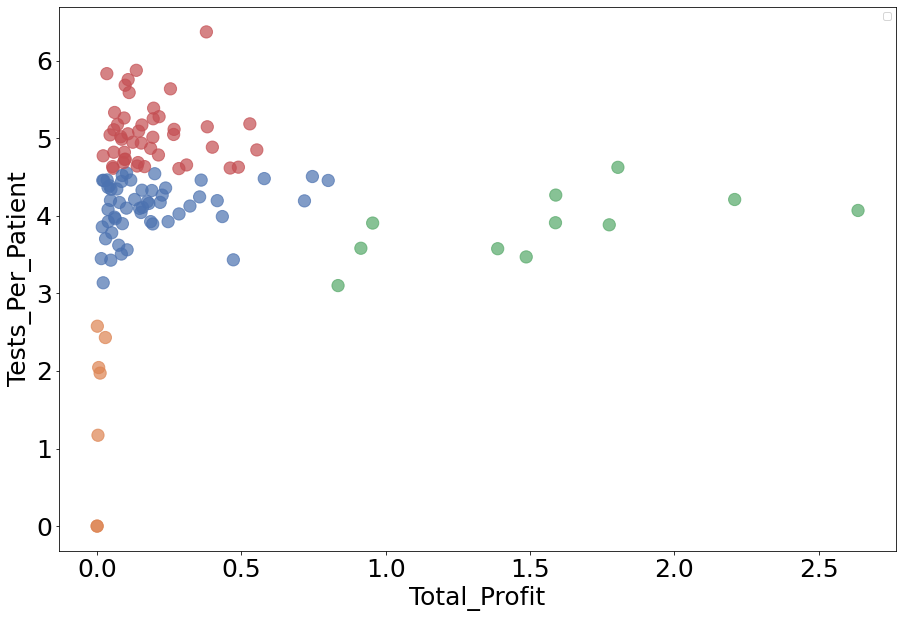

In [825]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,10))
plt.scatter(df['Total_Profit_Normalized'], df['Tests_Per_Patient'], c= colors, s=150, alpha=0.7)
plt.xlabel('Total_Profit', size='25')
plt.ylabel('Tests_Per_Patient', size='25')
plt.yticks(size='25')
plt.xticks(size='25')

plt.legend(loc='upper right')
plt.show()
# Plota os clusters em um gráfico de Exames por Habitante x Lucro Total
# Aqui, observamos três clusters: 
# Laboratórios com baixo lucro e baixa fidelização (laranja)
# Laboratórios com lucro baixo/médio e boa fidelização (azul)
# Laboratórios com lucro baixo/médio e alta fidelização (vermelho)
# Laboratórios com alto lucro e boa fidelização (verde)
# Observando o gráfico, fica claro que os laboratórios com maior lucro total não apresentam altíssima
# fidelização, portanto é preciso compreender, especialmente, o que difere os laboratório
# do cluster verde daqueles do cluster azul.

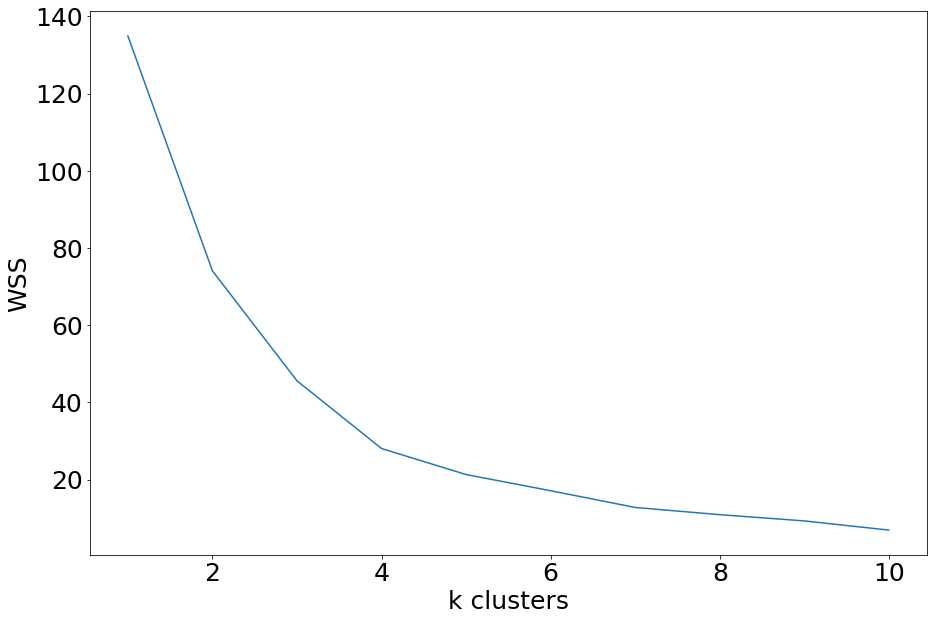

In [826]:
plt.figure(figsize=(15,10))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dfk)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('k clusters', size='25')
plt.ylabel('WSS', size='25') #within cluster sum of squares
plt.yticks(size='25')
plt.xticks(size='25')
plt.show()

# Este código utiliza o Elbow Method, que avalia qual o número ótimo de clusters a ser
# obtido do processo de clusterização. Tal número ocorre no ponto de inflexão ("cotovelo")
# da curva. Neste caso, o número ótimo de clusters é n = 3 ou 4.

In [778]:
# Agora, é preciso entender quais características mais contribuem para que os laboratórios tenham suucesso

In [827]:
df.head(2)

,Total_Profit_Normalized,Tests_Per_Patient,cluster,Lab_Id,ZCTA5,Total_Profit_Whole,Profit_Per_Inhabitant_Whole
0,1.589254,4.267291,2,L152,30096,3724757.32,54.224823
1,0.214697,5.277778,3,L520,13440,503187.64,12.268680


In [828]:
df.head(2)

,Total_Profit_Normalized,Tests_Per_Patient,cluster,Lab_Id,ZCTA5,Total_Profit_Whole,Profit_Per_Inhabitant_Whole
0,1.589254,4.267291,2,L152,30096,3724757.32,54.224823
1,0.214697,5.277778,3,L520,13440,503187.64,12.268680


In [829]:
df['Total_Population_of_ZCTA'] = df.progress_apply(lambda row: df_econ_data_uni[df_econ_data_uni['ZCTA5'] == row[4]]['TotalPopulation'].sum(), raw=True, axis=1)
df['MedianAgeInYears'] = df.progress_apply(lambda row: df_econ_data_uni[df_econ_data_uni['ZCTA5'] == row[4]]['MedianAgeInYears'].sum(), raw=True, axis=1)
# adiciona colunas aos laboratórios relativas à mediana de idade e população total do ZCTA

100%|██████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 1478.93it/s]


In [831]:
i = 21
for column in df_econ_data_uni.columns[21:32]:
    df[column] = df.progress_apply(lambda row: df_econ_data_uni[df_econ_data_uni['ZCTA5'] == row[4]][column].sum(), raw=True, axis=1)
# Adiciona colunas relativas a faixas de renda

100%|██████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 1516.85it/s]


In [866]:
for column in df_econ_data_uni.columns[7:19+1]:
    df[column] = df.progress_apply(lambda row: df_econ_data_uni[df_econ_data_uni['ZCTA5'] == row[4]][column].sum(), raw=True, axis=1)
# Adiciona colunas relativas a faixas de renda

100%|██████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 1597.91it/s]


In [868]:
df.head(2)

,Total_Profit_Normalized,Tests_Per_Patient,cluster,Lab_Id,ZCTA5,Total_Profit_Whole,Profit_Per_Inhabitant_Whole,Total_Population_of_ZCTA,MedianAgeInYears,TotalHouseholds_Below10k,...,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver
0,1.589254,4.267291,2,L152,30096,3724757.32,54.224823,68691,35.8,11.0,...,4130,4874,11188,9629,10248,4386,3492,4636,1988,660
1,0.214697,5.277778,3,L520,13440,503187.64,12.268680,41014,40.5,8.0,...,1832,2360,6157,4432,4841,3431,3168,3819,2456,1094


In [869]:
df_geocode

,Lab Id,Address,Location,ZCTA5
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469
...,...,...,...,...
113,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002
114,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421
115,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304
116,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806


In [870]:
df['Latitude'] = df.progress_apply(lambda row: float(str(df_geocode[df_geocode['Lab Id'] == row[3]]['Location'].sum()).split(',')[0]), raw=True, axis=1)
df['Longitude'] = df.progress_apply(lambda row: float(str(df_geocode[df_geocode['Lab Id'] == row[3]]['Location'].sum()).split(',')[1]), raw=True, axis=1)
# Adiciona colunas de localização

100%|██████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 1599.19it/s]


In [872]:
df

,Total_Profit_Normalized,Tests_Per_Patient,cluster,Lab_Id,ZCTA5,Total_Profit_Whole,Profit_Per_Inhabitant_Whole,Total_Population_of_ZCTA,MedianAgeInYears,TotalHouseholds_Below10k,...,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver
0,1.589254,4.267291,2,L152,30096,3724757.32,54.224823,68691,35.8,11.0,...,4130,4874,11188,9629,10248,4386,3492,4636,1988,660
1,0.214697,5.277778,3,L520,13440,503187.64,12.268680,41014,40.5,8.0,...,1832,2360,6157,4432,4841,3431,3168,3819,2456,1094
2,0.718453,4.192459,0,L141,98034,1683849.05,38.734997,43471,36.8,8.0,...,1846,2392,8207,6852,5702,2235,2712,3682,1496,623
3,0.138680,4.641646,3,L524,30342,325025.36,10.527819,30873,33.4,132.0,...,1701,1638,6419,4496,4319,1820,1257,1854,633,301
4,0.033689,5.832627,3,L545,61469,78956.93,35.678685,2213,51.5,105.0,...,143,152,195,214,308,266,181,274,181,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.147080,4.095544,0,L886,8002,344713.80,15.011052,22964,41.4,14.0,...,1390,1202,2933,3449,2828,1508,1599,2492,1157,742
114,0.062904,3.962520,0,L535,13421,147429.55,11.212225,13149,42.8,297.0,...,684,541,1875,1270,2024,958,1082,1310,553,462
115,0.022744,4.457086,0,L723,13304,53305.69,32.965795,1617,50.2,447.0,...,52,91,103,219,237,182,114,163,185,10
116,0.173825,4.181720,0,L163,52806,407396.93,14.401758,28288,37.0,0.0,...,1519,1476,4062,3282,3352,1882,1683,2574,1405,824


In [873]:
df_blue = df[df['cluster'] == 0]
df_green = df[df['cluster'] == 2]
df_red = df[df['cluster'] == 3]
df_orange = df[df['cluster'] == 1]

No handles with labels found to put in legend.


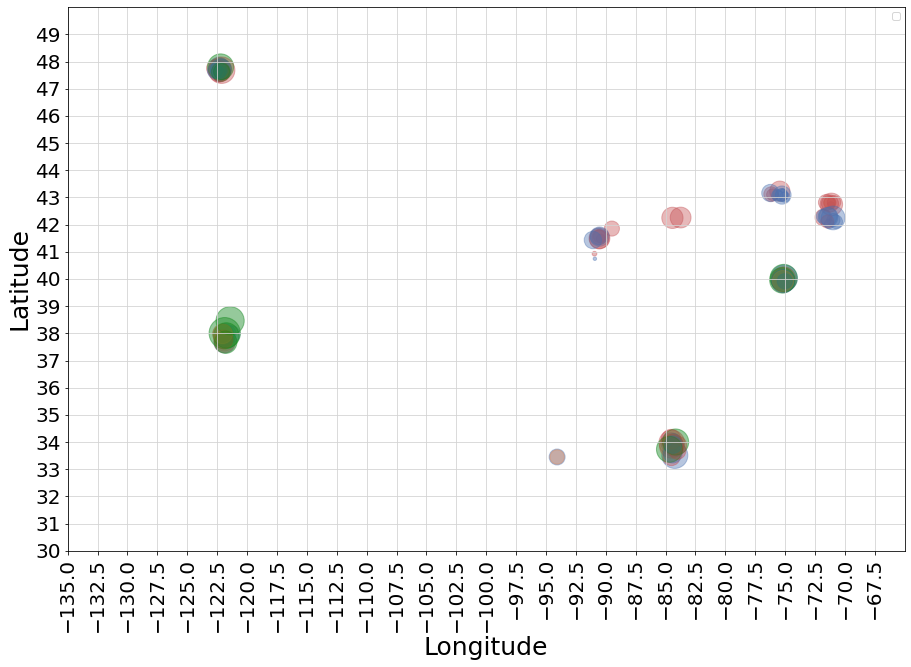

In [1002]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,10))
x = 'Longitude'
y = 'Latitude'
plt.scatter(df[x], df[y], c= colors, s=df['Total_Population_of_ZCTA']/100, alpha=0.4)
plt.scatter(df_green[x], df_green[y], c= 'green', s=df_green['Total_Population_of_ZCTA']/100, alpha=0.2)
plt.xlabel(x, size='25')
plt.ylabel(y, size='25')
plt.xticks(np.arange(-135, -65, step=2.5), size='20', rotation='vertical')
plt.yticks(np.arange(30, 50, step=1), size='20')
plt.xlim([-135, -65])
plt.ylim([30, 50])
plt.grid(c='lightgrey')

plt.legend(loc='upper right')
plt.show()
# Plota os clusters em disposição geográfica. 
# Aqui podemos observar que laboratórios do cluster verde (de alto lucro e boa fidelização) tendem a 
# estarem em ZCTAs próximos e, como evidenciado pelo raio dos círculos verdes, em ZCTAs com população
# elevada. 

No handles with labels found to put in legend.


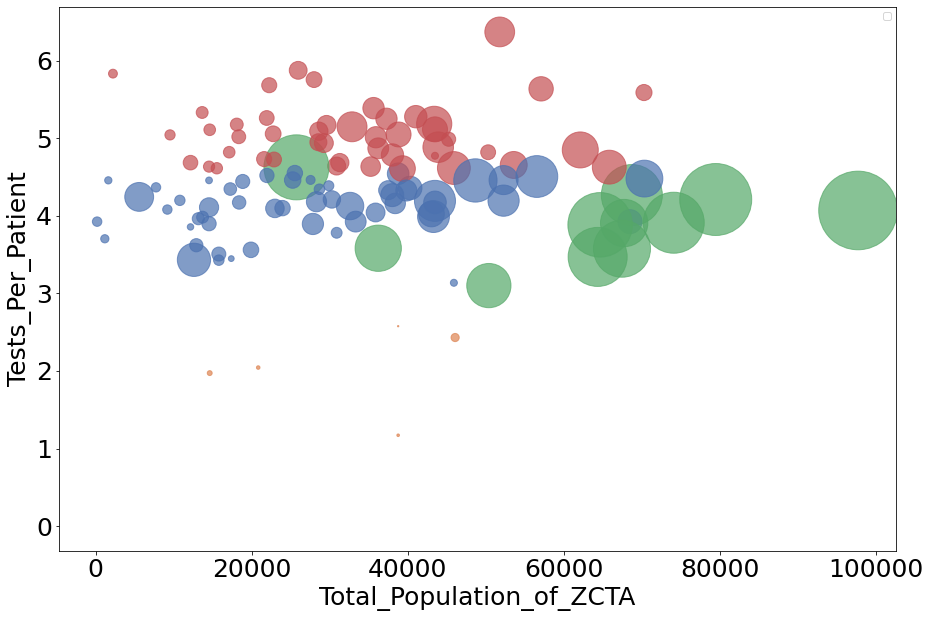

In [1150]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,10))
x = 'Total_Population_of_ZCTA'
y = 'Tests_Per_Patient'
plt.scatter(df[x], df[y], c= colors, s=df['Total_Profit_Whole']/1000, alpha=0.7)
plt.xlabel(x, size='25')
plt.ylabel(y, size='25')
plt.yticks(size='25')
plt.xticks(size='25')

plt.legend(loc='upper right')
plt.show()
# Este gráfico revela que o grupo de maior sucesso tende a se concentrar em ZCTAs mais populosas.
# Alguns dos labs de maior sucesso não estão nos ZCTAs mais populosos, mas os mais rentáveis dentre
# os melhores estão em ZCTAs mais populosos.

# Procura pelos 3 ZCTAs

In [925]:
df_zip_lat_lon = pd.read_csv(r'C:\Users\spide\Documents\ProcessoSeletivo\dataEloGroup\zip_to_lat_lon_North America.csv', sep=',')
df_zip_lat_lon.head()
# Leitura de um arquivo com informações geográficas acerca de zip_codes na américa no norte

C:\Users\spide\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country code,postal code,place,state,statecode,province_or_county,province_or_countycode,community,communitycode,latitude,longitude,accuracy,Country,Continent
0,BM,DV 01,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
1,BM,DV 02,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
2,BM,DV 03,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
3,BM,DV 04,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
4,BM,DV 05,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America


In [936]:
df_econ_data_uni['Latitude'] = df_econ_data_uni.progress_apply(
    lambda row: df_zip_lat_lon[df_zip_lat_lon['postal code'] == row['ZCTA5']][df_zip_lat_lon['country code'] == 'US']['latitude'].sum(),
    raw=True, axis=1)
# aidciona coluna latitude

  0%|                                                                              | 1/33120 [00:00<1:00:37,  9.11it/s]<ipython-input-936-fe01b8ae74bc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambda row: df_zip_lat_lon[df_zip_lat_lon['postal code'] == row['ZCTA5']][df_zip_lat_lon['country code'] == 'US']['latitude'].sum(),
100%|████████████████████████████████████████████████████████████████████████████| 33120/33120 [12:25<00:00, 44.40it/s]


In [952]:
df_econ_data_uni['Longitude'] = df_econ_data_uni.progress_apply(
    lambda row: df_zip_lat_lon[df_zip_lat_lon['postal code'] == row['ZCTA5']][df_zip_lat_lon['country code'] == 'US']['longitude'].sum(),
    raw=True, axis=1)
# aidciona coluna longitude

  0%|                                                                                        | 0/33120 [00:00<?, ?it/s]<ipython-input-952-8c18e37b336b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lambda row: df_zip_lat_lon[df_zip_lat_lon['postal code'] == row['ZCTA5']][df_zip_lat_lon['country code'] == 'US']['longitude'].sum(),
100%|████████████████████████████████████████████████████████████████████████████| 33120/33120 [12:32<00:00, 44.02it/s]


In [1039]:
df_econ_data_uni

,Id,GeographicAreaName,ZCTA5,Labs,Eligible,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,...,TotalHouseholds_25to35k,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds,Latitude,Longitude
0,8600000US35004,ZCTA5 35004,35004,[],1,12045,94.1,805,1075,898,...,513.0,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0,33.6035,-86.4668
1,8600000US35005,ZCTA5 35005,35005,[],1,7344,86.1,504,453,511,...,293.0,353.0,562.0,299.0,407.0,67.0,26.0,2697.0,33.5884,-86.9597
2,8600000US35006,ZCTA5 35006,35006,[],1,2883,108.2,96,153,303,...,104.0,154.0,176.0,124.0,194.0,51.0,7.0,1018.0,33.4343,-87.1675
3,8600000US35007,ZCTA5 35007,35007,[],1,26332,95.0,1936,1992,1837,...,462.0,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0,33.1934,-86.7944
4,8600000US35010,ZCTA5 35010,35010,[],1,20613,90.5,1306,1465,944,...,957.0,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0,32.9164,-85.9368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,979,[],1,16130,91.6,402,532,554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000
33116,8600000US00982,ZCTA5 00982,982,[],1,14346,81.0,431,952,795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000
33117,8600000US00983,ZCTA5 00983,983,[],1,33947,81.4,1833,1589,1841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000
33118,8600000US00985,ZCTA5 00985,985,[],1,31682,82.4,1171,1427,1833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000


In [1044]:
df_green

,Total_Profit_Normalized,Tests_Per_Patient,cluster,Lab_Id,ZCTA5,Total_Profit_Whole,Profit_Per_Inhabitant_Whole,Total_Population_of_ZCTA,MedianAgeInYears,TotalHouseholds_Below10k,...,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver
0,1.589254,4.267291,2,L152,30096,3724757.32,54.224823,68691,35.8,11.0,...,4130,4874,11188,9629,10248,4386,3492,4636,1988,660
12,0.913941,3.581805,2,L061,98004,2142016.11,59.168447,36202,37.8,363.0,...,1343,1836,8340,5246,5095,2201,1753,2597,1762,929
19,1.588274,3.910726,2,L166,19120,3722461.44,50.262779,74060,30.2,359.0,...,5761,6491,10764,8613,10024,4874,3343,3961,1654,411
20,1.804582,4.624827,2,L121,98008,4229425.57,164.447512,25719,42.3,32.0,...,1350,1100,3147,3673,4037,1851,1405,2561,1068,888
29,0.954775,3.906528,2,L662,30135,2237721.46,33.048611,67710,37.7,32.0,...,4956,4055,7740,9294,10592,3992,3916,5779,2207,740
44,1.387991,3.575907,2,L156,98012,3253055.98,48.245599,67427,35.4,257.0,...,3536,3821,10739,11182,9203,3792,2980,4558,1794,811
46,1.486845,3.470026,2,L155,94513,3484741.31,54.184089,64313,40.5,575.0,...,5413,3744,6191,7987,9462,4785,3770,5374,3126,1430
81,2.209188,4.210130,2,L139,95823,5177706.80,65.177578,79440,31.4,1210.0,...,5412,5570,13578,9398,8329,4965,4165,5384,1904,1036
84,1.774562,3.883782,2,L123,19143,4159067.54,64.351966,64630,32.9,0.0,...,3366,4906,12321,7904,6854,3353,3544,4930,2538,1456
87,0.834834,3.100463,2,L157,94550,1956611.99,38.841704,50374,42.7,287.0,...,2387,2141,5978,6400,7646,4268,3208,4656,2639,1296


In [1050]:
df_econ_data_uni['Green_Cluster'] = df_econ_data_uni.progress_apply(
    lambda row: df_green[df_green['ZCTA5'] == row[2]].index.size, raw=True, axis=1)
# Cria uma coluna com bool avisando se há algum laboratório do Cluster verde no ZCTA da linha

100%|██████████████████████████████████████████████████████████████████████████| 33120/33120 [00:18<00:00, 1820.72it/s]


In [1053]:
df_econ_data_uni.to_csv('df_ZCTA_uni_data_NEW.csv', index = False)
# salva novo arquivo

In [1054]:
df_econ_data_uni

,Id,GeographicAreaName,ZCTA5,Labs,Eligible,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,...,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds,Latitude,Longitude,Green_Cluster
0,8600000US35004,ZCTA5 35004,35004,[],1,12045,94.1,805,1075,898,...,647.0,1117.0,529.0,945.0,245.0,61.0,4624.0,33.6035,-86.4668,0
1,8600000US35005,ZCTA5 35005,35005,[],1,7344,86.1,504,453,511,...,353.0,562.0,299.0,407.0,67.0,26.0,2697.0,33.5884,-86.9597,0
2,8600000US35006,ZCTA5 35006,35006,[],1,2883,108.2,96,153,303,...,154.0,176.0,124.0,194.0,51.0,7.0,1018.0,33.4343,-87.1675,0
3,8600000US35007,ZCTA5 35007,35007,[],1,26332,95.0,1936,1992,1837,...,1173.0,1854.0,1578.0,2224.0,473.0,254.0,9292.0,33.1934,-86.7944,0
4,8600000US35010,ZCTA5 35010,35010,[],1,20613,90.5,1306,1465,944,...,1056.0,1512.0,807.0,749.0,254.0,249.0,7987.0,32.9164,-85.9368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,979,[],1,16130,91.6,402,532,554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0
33116,8600000US00982,ZCTA5 00982,982,[],1,14346,81.0,431,952,795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0
33117,8600000US00983,ZCTA5 00983,983,[],1,33947,81.4,1833,1589,1841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0
33118,8600000US00985,ZCTA5 00985,985,[],1,31682,82.4,1171,1427,1833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0


No handles with labels found to put in legend.


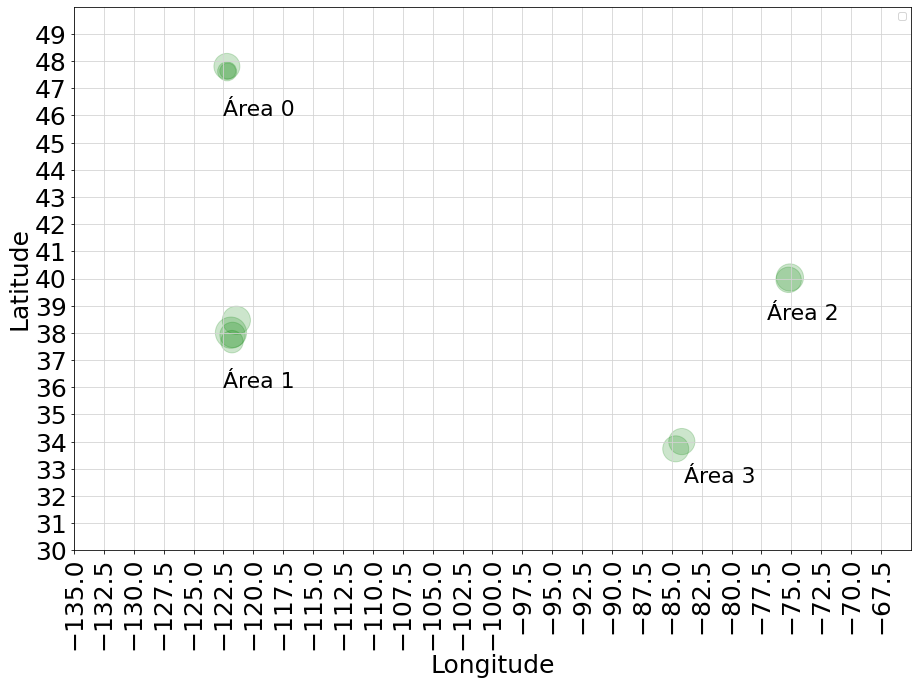

In [1055]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,10))
x = 'Longitude'
y = 'Latitude'
#plt.scatter(df[x], df[y], c= colors, s=df['Total_Population_of_ZCTA']/100, alpha=0.4)
plt.scatter(df_green[x], df_green[y], c= 'green', s=df_green['Total_Population_of_ZCTA']/100, alpha=0.2)
#plt.scatter([-122.4411],[37.7195], c= 'purple', s=100, alpha=0.8)
plt.xlabel(x, size='25')
plt.ylabel(y, size='25')
plt.xticks(np.arange(-135, -65, step=2.5), size='20', rotation='vertical')
plt.yticks(np.arange(30, 50, step=1), size='20')
plt.yticks(size='25')
plt.xticks(size='25')
plt.xlim([-135, -65])
plt.ylim([30, 50])
plt.grid(c='lightgrey')
plt.text(-122.5, 46, 'Área 0', fontsize = 22)
plt.text(-122.5, 36, 'Área 1', fontsize = 22)
plt.text(-77, 38.5, 'Área 2', fontsize = 22)
plt.text(-84, 32.5, 'Área 3', fontsize = 22)

plt.legend(loc='upper right')
plt.show()

# Utilizando este gráfico podemos determinar com mais precisão as áreas em que é interessante abrir 
# novos laboratórios. Sabendo que os labs do grupo verde são os de maior sucesso e sabendo que eles
# estão sempre próximos a outros laboratórios de sucesso, é natural que procuremos instalar
# novos laboratórios próximos a outros de sucesso. 
# Para isso, vamos determinar quais são as áreas possíveis para instalação de novos laboratórios.

In [1321]:
area0 = {'lat_center' : 47.5, 'lon_center' : -122, 'delta': 0.5}
area1 = {'lat_center' : 38, 'lon_center' : -122, 'delta': 1}
area2 = {'lat_center' : 40, 'lon_center' : -75.5, 'delta': 0.5}
area3 = {'lat_center' :34, 'lon_center' : -84, 'delta': 1}
areas = [area0, area1, area2, area3]
# cria um dicionário com infomrações geográficas de cada área

In [1322]:
# Como mostrado no artigo científico, é essencial que as análises para instalação de uma clínica 
# utilize os dados locais com muita precisão. Por isso, o perfil de cada grupo de laboratórios bem
# sucedidos (nas Áreas 1 a 4) precisa ser traçado de forma individual, a se buscar o melhor 
# ZCTA próximo que se parece com aquele dos laboratórios da região.

In [1323]:
areas_zips = []
for area in areas:
    aux = df_econ_data_uni[df_econ_data_uni['Latitude'] <= area['lat_center'] + area['delta']]
    aux = aux[df_econ_data_uni['Latitude'] >= area['lat_center'] - area['delta']]
    aux = aux[df_econ_data_uni['Longitude'] >= area['lon_center'] - area['delta']]
    aux = aux[df_econ_data_uni['Longitude'] <= area['lon_center'] + area['delta']]
    aux = aux.sort_values(by=['TotalPopulation'], ascending=False)
    areas_zips.append(aux)
# cria um dataframe para cada área, com todos os zctas naquela área em ordem decrescente de população

<ipython-input-1323-88db3276eed5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aux = aux[df_econ_data_uni['Latitude'] >= area['lat_center'] - area['delta']]
<ipython-input-1323-88db3276eed5>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aux = aux[df_econ_data_uni['Longitude'] >= area['lon_center'] - area['delta']]
<ipython-input-1323-88db3276eed5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aux = aux[df_econ_data_uni['Longitude'] <= area['lon_center'] + area['delta']]


# Area Analysis

In [1290]:
def y_econ(area_n, n):
    greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]
    y = []
    for i, j in enumerate(greens.to_numpy()[n][21:30+1]):
        y.append(j)
    return y
# Função a ser usada para fazer o gráfico de análise econômica por área (dos zctas verdes)

In [1291]:
def y_econ_eligible(area_n, n):
    eligible = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 1][areas_zips[area_n]['TotalHouseholds'] > 1000]
    y = []
    for i, j in enumerate(eligible.to_numpy()[n][21:30+1]):
        y.append(j)
    return y
# Função a ser usada para fazer o gráfico de análise econômica por área (dos zctas elegíveis)

In [1292]:
def y_age(area_n, n):
    greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]
    y = []
    for i, j in enumerate(greens.to_numpy()[n][7:20]):
        if i in [0, 1, 2, 3, 4, 8, 9, 12]:
            y.append(j)
        else:
            y.append(j/2)
            y.append(j/2)
    return y
# Função a ser usada para fazer o gráfico de análise etária por área (dos zctas verdes)

In [1293]:
def y_age_eligible(area_n, n):
    eligible = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 1][areas_zips[area_n]['TotalHouseholds'] > 1000]
    y = []
    for i, j in enumerate(eligible.to_numpy()[n][7:20]):
        if i in [0, 1, 2, 3, 4, 8, 9, 12]:
            y.append(j)
        else:
            y.append(j/2)
            y.append(j/2)
    return y
# Função a ser usada para fazer o gráfico de análise etária por área (dos zctas elegíveis)

## Área 0


In [1294]:
greens0 = areas_zips[0][areas_zips[0]['Eligible'] == 0][areas_zips[0]['Green_Cluster'] == 1]
# df com ZCTAs na área 0 em que há um laboratório verde

<ipython-input-1294-86120edd9855>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens0 = areas_zips[0][areas_zips[0]['Eligible'] == 0][areas_zips[0]['Green_Cluster'] == 1]


In [1295]:
greens0

,Id,GeographicAreaName,ZCTA5,Labs,Eligible,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,...,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds,Latitude,Longitude,Green_Cluster
30743,8600000US98012,ZCTA5 98012,98012,['L156'],0,67427,100.2,5132,5212,4667,...,1411.0,2282.0,1392.0,2686.0,1359.0,1455.0,12877.0,47.8401,-122.1972,1
30736,8600000US98004,ZCTA5 98004,98004,"['L061', 'L060']",0,36202,105.3,1692,1450,1958,...,831.0,1013.0,625.0,591.0,188.0,119.0,4941.0,47.6155,-122.2072,1
30740,8600000US98008,ZCTA5 98008,98008,['L121'],0,25719,102.2,1376,1761,1502,...,87.0,164.0,31.0,26.0,12.0,12.0,468.0,47.6115,-122.1162,1


In [1296]:
eligible0 = areas_zips[0][areas_zips[0]['Eligible'] == 1][areas_zips[0]['TotalHouseholds'] > 1000]
# df com ZCTAs área 0 que são elegíveis
# Observação: como muitos os ZCTAs possuem valores muito pequenos de TotalHouseholds (e o mesmo não
# se aplica aos ZCTAs com laboratórios bem sucedidos), optamos por limitar o dataframe apenas a
# ZCTAs com um número mínimo de households (1000)

<ipython-input-1296-e967db7d7978>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eligible0 = areas_zips[0][areas_zips[0]['Eligible'] == 1][areas_zips[0]['TotalHouseholds'] > 1000]


In [1297]:
eligible0.head(12)

,Id,GeographicAreaName,ZCTA5,Labs,Eligible,TotalPopulation,SexRatio_Mper100F,Population_Under5Years,Population_5to9Years,Population_10to14Years,...,TotalHouseholds_35to50k,TotalHouseholds_50to75k,TotalHouseholds_75to100k,TotalHouseholds_100to150k,TotalHouseholds_150to200k,TotalHouseholds_Over200k,TotalHouseholds,Latitude,Longitude,Green_Cluster
30946,8600000US98374,ZCTA5 98374,98374,[],1,41613,94.0,2598,2875,3020,...,127.0,114.0,367.0,172.0,39.0,0.0,1074.0,47.1424,-122.2652,0
30757,8600000US98032,ZCTA5 98032,98032,[],1,39074,99.9,2362,3199,2319,...,1239.0,1724.0,866.0,387.0,83.0,89.0,8523.0,47.3776,-122.2854,0
30756,8600000US98031,ZCTA5 98031,98031,[],1,37850,109.4,2608,2240,2176,...,1406.0,1475.0,1199.0,1092.0,355.0,224.0,8338.0,47.3880,-122.1932,0
30827,8600000US98203,ZCTA5 98203,98203,[],1,36065,103.2,2144,2032,2264,...,233.0,352.0,238.0,105.0,51.0,28.0,1986.0,47.9419,-122.2218,0
30814,8600000US98155,ZCTA5 98155,98155,[],1,35041,87.7,2015,2407,1658,...,138.0,200.0,152.0,294.0,58.0,0.0,1259.0,47.7559,-122.3003,0
30742,8600000US98011,ZCTA5 98011,98011,[],1,33830,102.7,2113,2131,1778,...,564.0,1242.0,534.0,716.0,183.0,172.0,4897.0,47.7497,-122.2159,0
30733,8600000US98001,ZCTA5 98001,98001,[],1,33699,103.3,2177,2488,2006,...,374.0,765.0,804.0,1412.0,768.0,937.0,5580.0,47.3099,-122.2653,0
30810,8600000US98144,ZCTA5 98144,98144,[],1,32439,103.7,1742,1603,1221,...,239.0,183.0,151.0,116.0,10.0,11.0,1166.0,47.5846,-122.3005,0
30747,8600000US98021,ZCTA5 98021,98021,[],1,31496,103.1,2276,2314,2004,...,209.0,258.0,79.0,142.0,59.0,10.0,1031.0,47.7918,-122.2243,0
30826,8600000US98201,ZCTA5 98201,98201,[],1,29792,111.2,1545,1268,1310,...,532.0,600.0,487.0,558.0,127.0,137.0,4487.0,47.9884,-122.2006,0


#### Análise Etária

In [1298]:
# x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
# plt.figure(figsize=(15,10))
# plt.bar(x, y_age(0, 0), width=4, align='edge', color='lightgreen')
# plt.xlabel('Idade', size='25')
# plt.ylabel('Habitantes', size='25')
# plt.xticks(np.arange(0, 90, step=5), size='20')
# plt.ylim([0, 7000])
# plt.yticks(size='25')
# plt.xticks(size='25')
# plt.show()

<ipython-input-1292-6e2e870af846>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


Text(70, 12000, '98144')

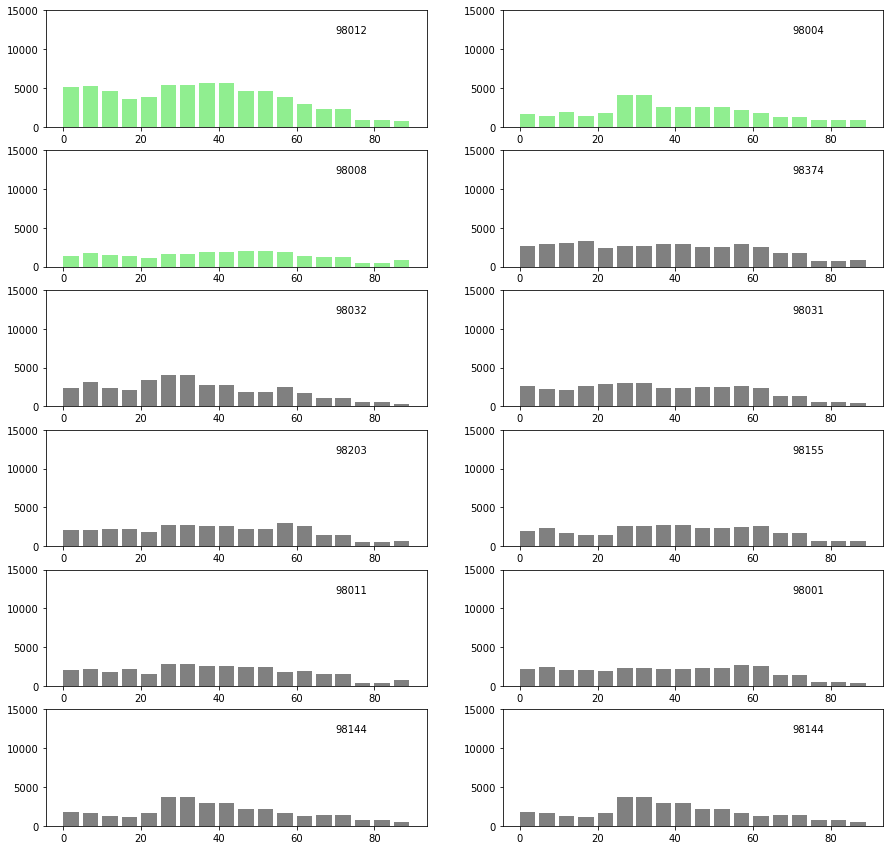

In [1299]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
i, j = (6, 2)
fig, axs = plt.subplots(i, j, figsize=(15,15))

axs[0, 0].bar(x, y_age(0, 0), width=4, align='edge', color='lightgreen')
axs[0, 0].set_ylim([0, 15000])
axs[0, 0].text(70, 12000, greens0.iloc[0]['ZCTA5'])

axs[0, 1].bar(x, y_age(0, 1), width=4, align='edge', color='lightgreen')
axs[0, 1].set_ylim([0, 15000])
axs[0, 1].text(70, 12000, greens0.iloc[1]['ZCTA5'])

axs[1, 0].bar(x, y_age(0, 2), width=4, align='edge', color='lightgreen')
axs[1, 0].set_ylim([0, 15000])
axs[1, 0].text(70, 12000, greens0.iloc[2]['ZCTA5'])

axs[1, 1].bar(x, y_age_eligible(0, 0), width=4, align='edge', color='grey')
axs[1, 1].set_ylim([0, 15000])
axs[1, 1].text(70, 12000, eligible0.iloc[0]['ZCTA5'])

axs[2, 0].bar(x, y_age_eligible(0, 1), width=4, align='edge', color='grey')
axs[2, 0].set_ylim([0, 15000])
axs[2, 0].text(70, 12000, eligible0.iloc[1]['ZCTA5'])

axs[2, 1].bar(x, y_age_eligible(0, 2), width=4, align='edge', color='grey')
axs[2, 1].set_ylim([0, 15000])
axs[2, 1].text(70, 12000, eligible0.iloc[2]['ZCTA5'])

axs[3, 0].bar(x, y_age_eligible(0, 3), width=4, align='edge', color='grey')
axs[3, 0].set_ylim([0, 15000])
axs[3, 0].text(70, 12000, eligible0.iloc[3]['ZCTA5'])

axs[3, 1].bar(x, y_age_eligible(0, 4), width=4, align='edge', color='grey')
axs[3, 1].set_ylim([0, 15000])
axs[3, 1].text(70, 12000, eligible0.iloc[4]['ZCTA5'])

axs[4, 0].bar(x, y_age_eligible(0, 5), width=4, align='edge', color='grey')
axs[4, 0].set_ylim([0, 15000])
axs[4, 0].text(70, 12000, eligible0.iloc[5]['ZCTA5'])

axs[4, 1].bar(x, y_age_eligible(0, 6), width=4, align='edge', color='grey')
axs[4, 1].set_ylim([0, 15000])
axs[4, 1].text(70, 12000, eligible0.iloc[6]['ZCTA5'])

axs[5, 0].bar(x, y_age_eligible(0, 7), width=4, align='edge', color='grey')
axs[5, 0].set_ylim([0, 15000])
axs[5, 0].text(70, 12000, eligible0.iloc[7]['ZCTA5'])

axs[5, 1].bar(x, y_age_eligible(0, 7), width=4, align='edge', color='grey')
axs[5, 1].set_ylim([0, 15000])
axs[5, 1].text(70, 12000, eligible0.iloc[7]['ZCTA5'])

#### Análise Sex Ratio

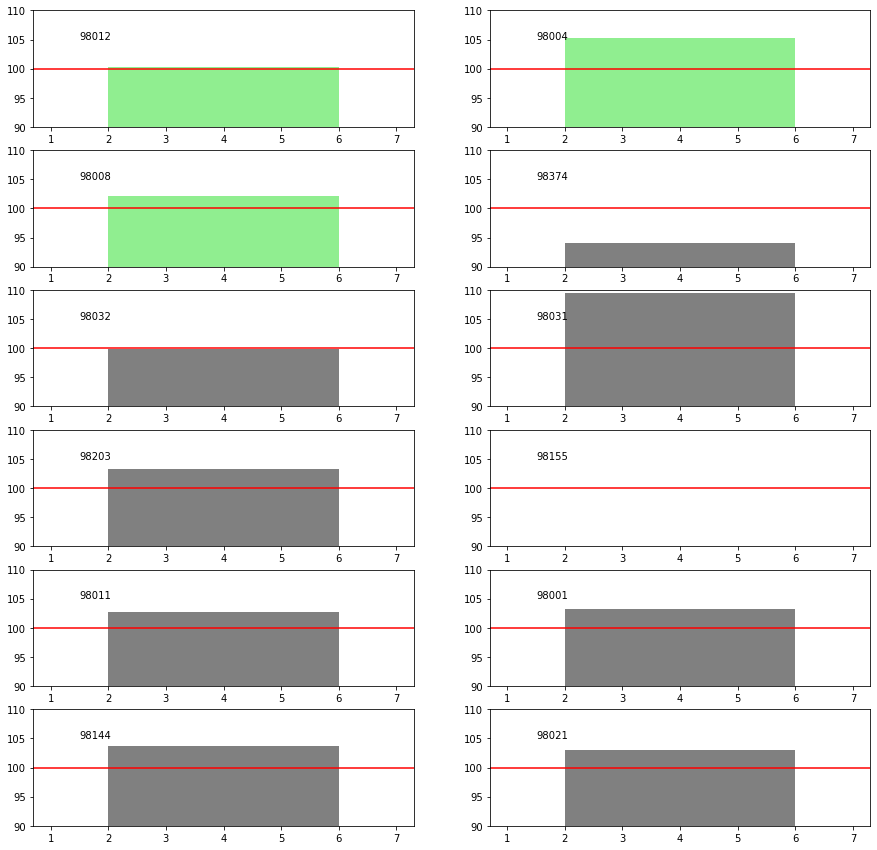

In [1300]:
x = [1, 2, 3]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i + j <= 1:
            axs[i, j].bar(x, [0, greens0.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([90, 110])
            axs[i, j].text(1.5, 105, greens0.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, [0, eligible0.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='grey')
            axs[i, j].set_ylim([90, 110])
            axs[i, j].text(1.5, 105, eligible0.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
  

#### Análise Econômica

<ipython-input-1290-8d58e13ff4c5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


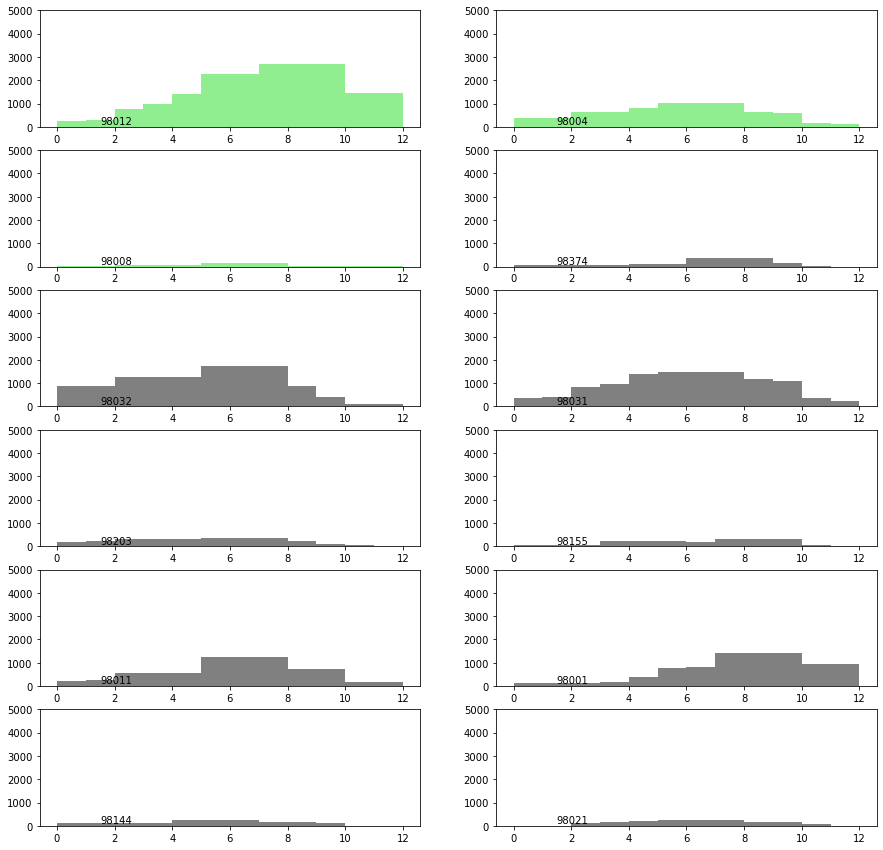

In [1301]:
x = range(10)
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i + j <= 1:
            axs[i, j].bar(x, y_econ(0, n), width=3, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, greens0.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_econ_eligible(0, n), width=3, align='edge', color='grey')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, eligible0.iloc[n]['ZCTA5'])
            n += 1
  

## Área 1

In [1302]:
greens1 = areas_zips[1][areas_zips[1]['Eligible'] == 0][areas_zips[1]['Green_Cluster'] == 1]
# df com ZCTAs na área 0 em que há um laboratório verde

eligible1 = areas_zips[1][areas_zips[1]['Eligible'] == 1][areas_zips[1]['TotalHouseholds'] > 1000]
# df com ZCTAs área 0 que são elegíveis
# Observação: como muitos os ZCTAs possuem valores muito pequenos de TotalHouseholds (e o mesmo não
# se aplica aos ZCTAs com laboratórios bem sucedidos), optamos por limitar o dataframe apenas a
# ZCTAs com um número mínimo de households (1000)



<ipython-input-1302-30594d483bee>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens1 = areas_zips[1][areas_zips[1]['Eligible'] == 0][areas_zips[1]['Green_Cluster'] == 1]
<ipython-input-1302-30594d483bee>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eligible1 = areas_zips[1][areas_zips[1]['Eligible'] == 1][areas_zips[1]['TotalHouseholds'] > 1000]


#### Análise Etária

<ipython-input-1292-6e2e870af846>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


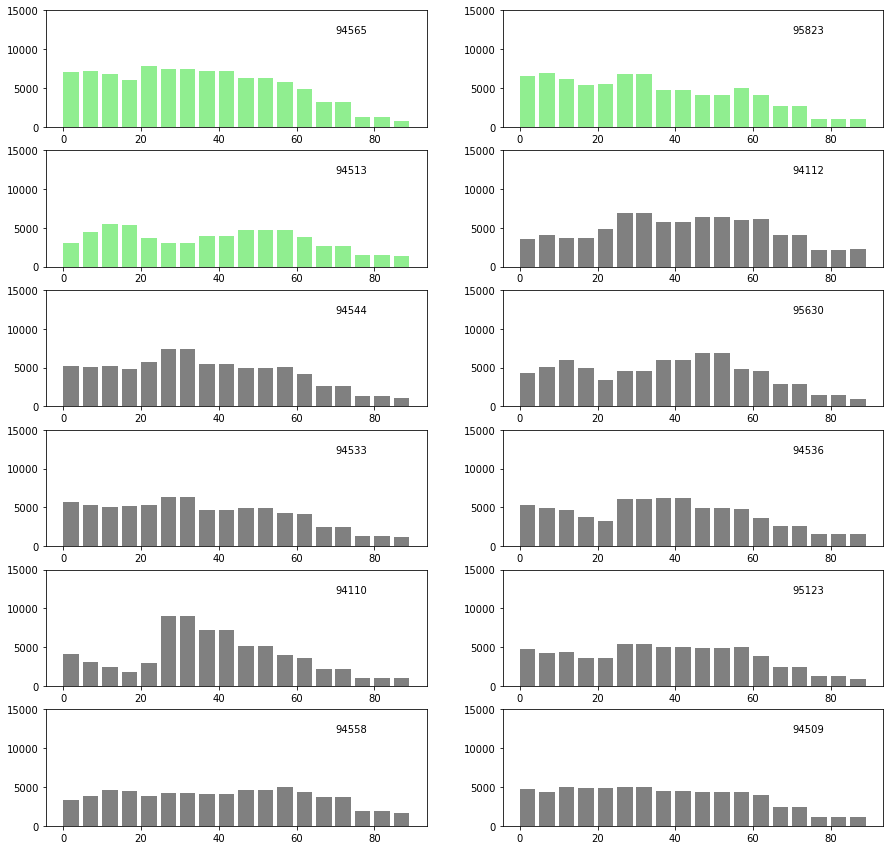

In [1303]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i + j <= 1:
            axs[i, j].bar(x, y_age(1, n), width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 15000])
            axs[i, j].text(70, 12000, greens1.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_age_eligible(1, n), width=4, align='edge', color='grey')
            axs[i, j].set_ylim([0, 15000])
            axs[i, j].text(70, 12000, eligible1.iloc[n]['ZCTA5'])
            n += 1
  

#### Análise Sex Ratio

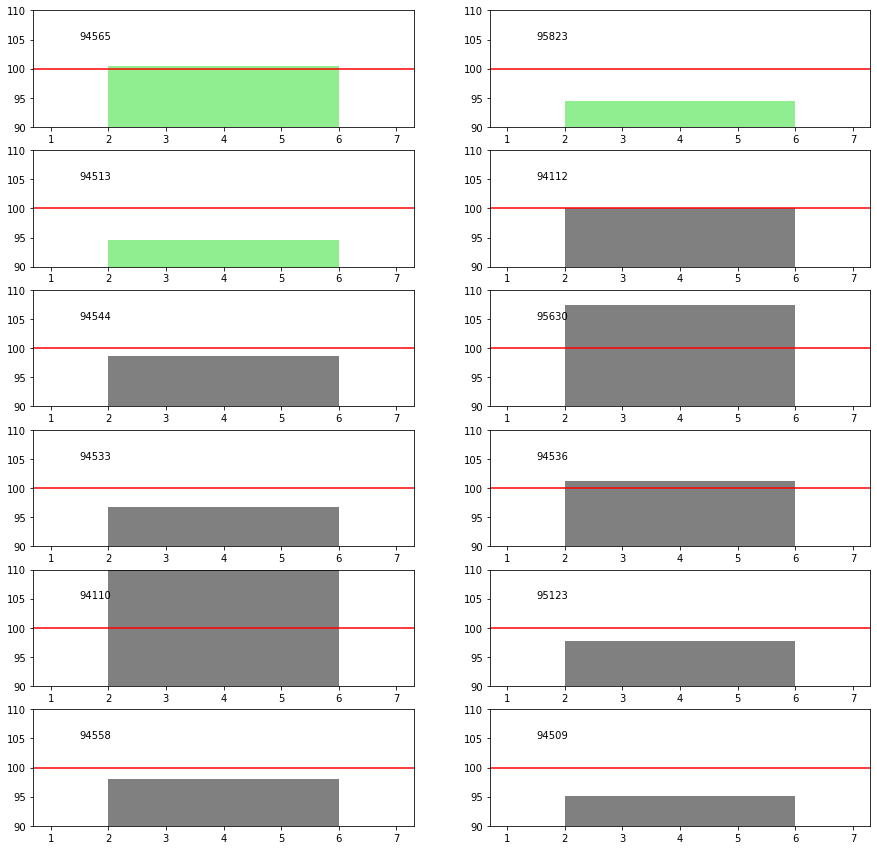

In [1304]:
x = [1, 2, 3]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i + j <= 1:
            axs[i, j].bar(x, [0, greens1.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([90, 110])
            axs[i, j].text(1.5, 105, greens1.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, [0, eligible1.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='grey')
            axs[i, j].set_ylim([90, 110])
            axs[i, j].text(1.5, 105, eligible1.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
  

#### Análise Econômica

<ipython-input-1290-8d58e13ff4c5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


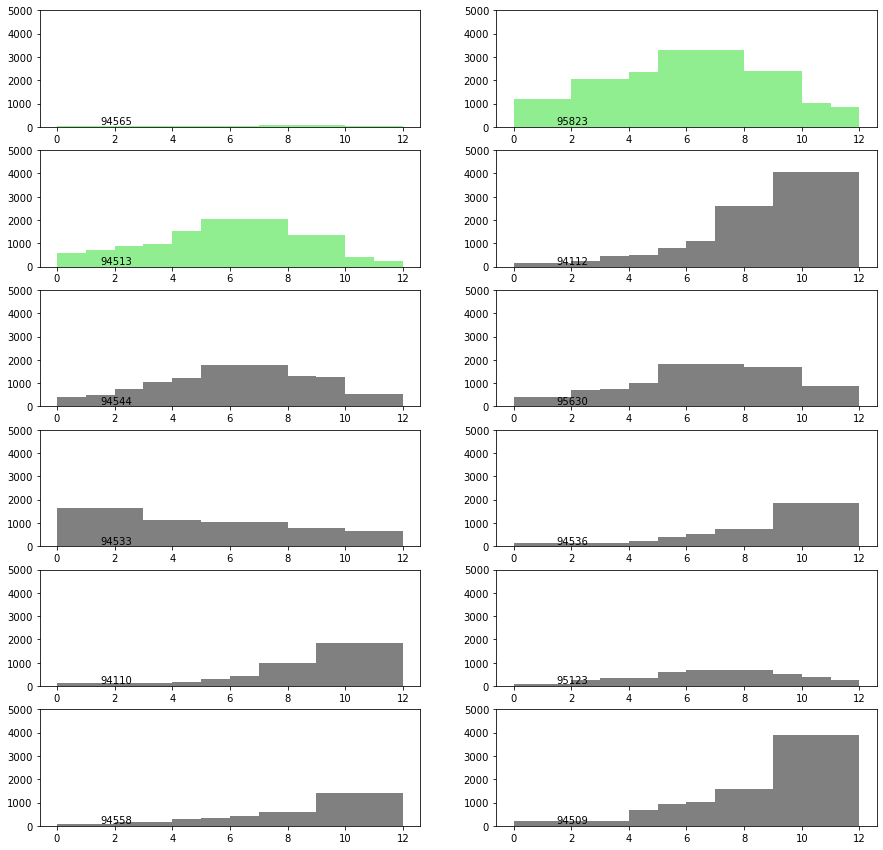

In [1305]:
x = range(10)
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i + j <= 1:
            axs[i, j].bar(x, y_econ(1, n), width=3, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, greens1.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_econ_eligible(1, n), width=3, align='edge', color='grey')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, eligible1.iloc[n]['ZCTA5'])
            n += 1
  

## Área 2

In [1306]:
greens2 = areas_zips[2][areas_zips[2]['Eligible'] == 0][areas_zips[2]['Green_Cluster'] == 1]
# df com ZCTAs na área 0 em que há um laboratório verde

eligible2 = areas_zips[2][areas_zips[2]['Eligible'] == 1][areas_zips[2]['TotalHouseholds'] > 1000]
# df com ZCTAs área 0 que são elegíveis
# Observação: como muitos os ZCTAs possuem valores muito pequenos de TotalHouseholds (e o mesmo não
# se aplica aos ZCTAs com laboratórios bem sucedidos), optamos por limitar o dataframe apenas a
# ZCTAs com um número mínimo de households (1000)



<ipython-input-1306-27334bac9757>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens2 = areas_zips[2][areas_zips[2]['Eligible'] == 0][areas_zips[2]['Green_Cluster'] == 1]
<ipython-input-1306-27334bac9757>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eligible2 = areas_zips[2][areas_zips[2]['Eligible'] == 1][areas_zips[2]['TotalHouseholds'] > 1000]


#### Análise Etária

<ipython-input-1292-6e2e870af846>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


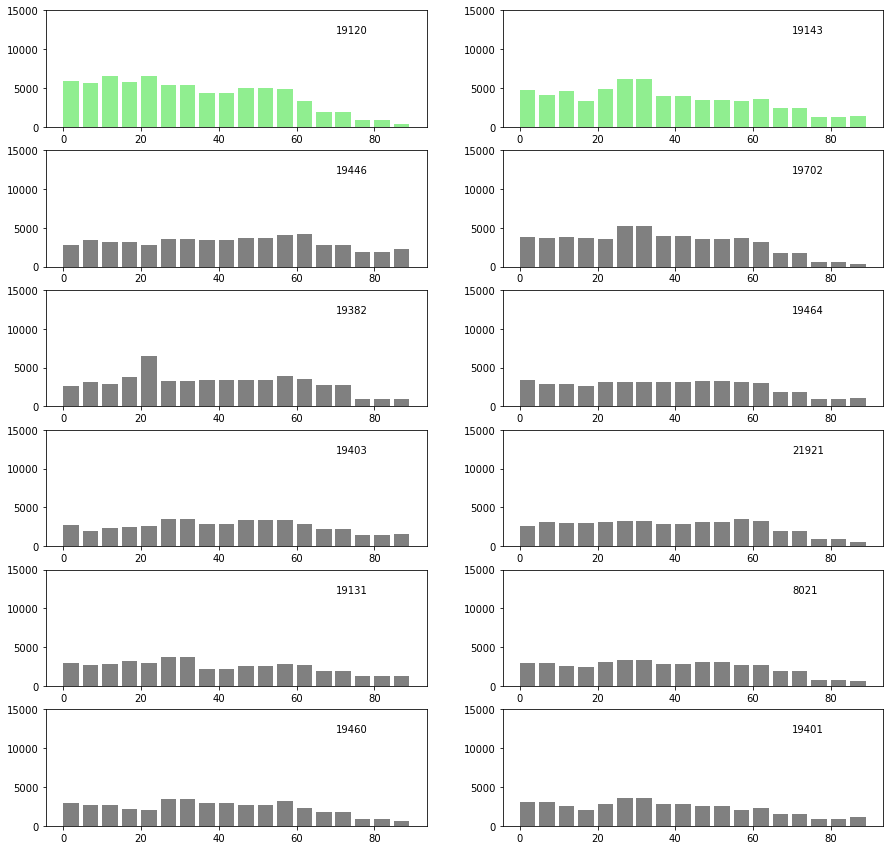

In [1307]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i == 0:
            axs[i, j].bar(x, y_age(2, n), width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 15000])
            axs[i, j].text(70, 12000, greens2.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_age_eligible(2, n), width=4, align='edge', color='grey')
            axs[i, j].set_ylim([0, 15000])
            axs[i, j].text(70, 12000, eligible2.iloc[n]['ZCTA5'])
            n += 1

#### Análise Sex Ratio

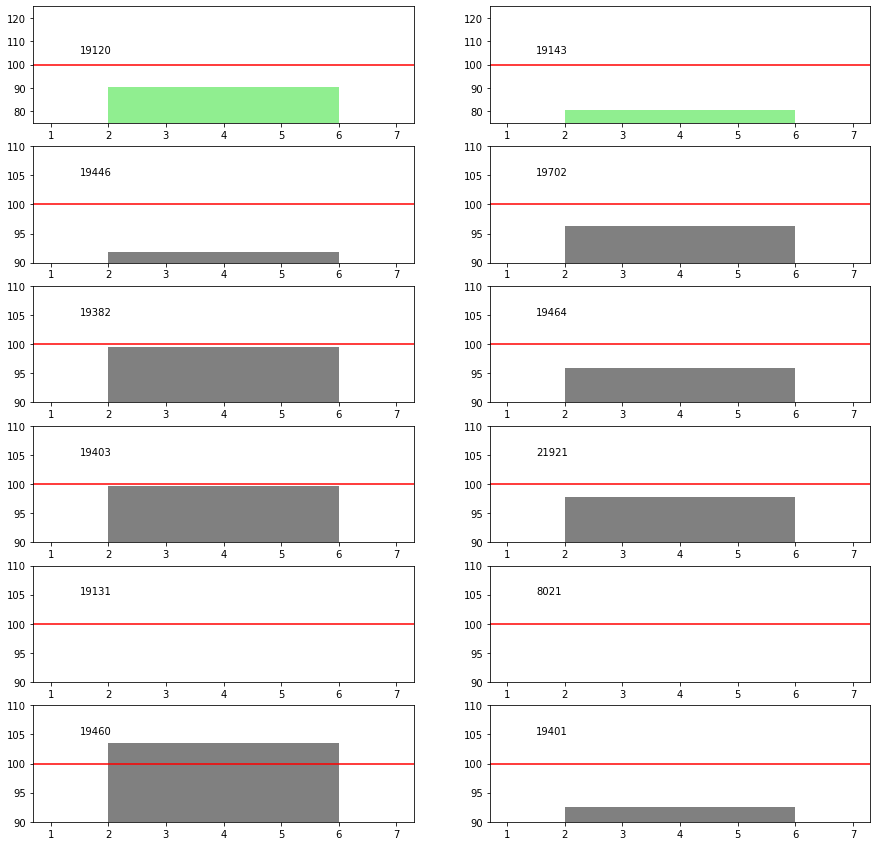

In [1313]:
x = [1, 2, 3]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i == 0:
            axs[i, j].bar(x, [0, greens2.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([75, 125])
            axs[i, j].text(1.5, 105, greens2.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, [0, eligible2.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='grey')
            axs[i, j].set_ylim([90, 110])
            axs[i, j].text(1.5, 105, eligible2.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
  

#### Análise Econômica

<ipython-input-1290-8d58e13ff4c5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


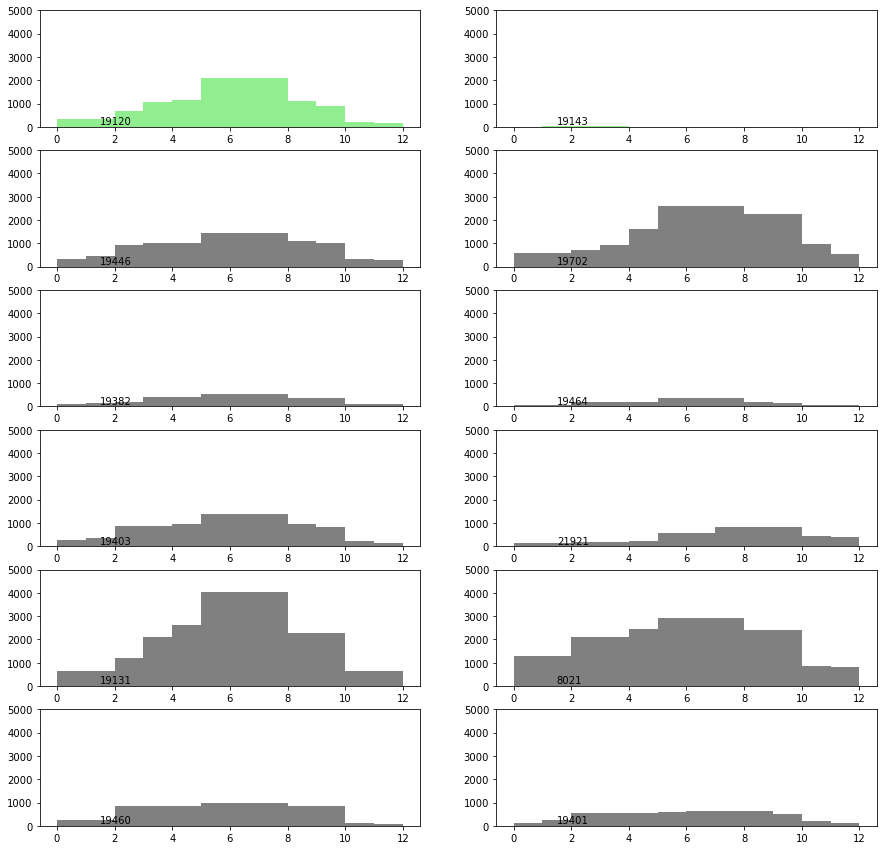

In [1309]:
x = range(10)
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i == 0:
            axs[i, j].bar(x, y_econ(2, n), width=3, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, greens2.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_econ_eligible(2, n), width=3, align='edge', color='grey')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, eligible2.iloc[n]['ZCTA5'])
            n += 1
  

## Área 3

In [1325]:
greens3 = areas_zips[3][areas_zips[3]['Eligible'] == 0][areas_zips[3]['Green_Cluster'] == 1]
# df com ZCTAs na área 0 em que há um laboratório verde

eligible3 = areas_zips[3][areas_zips[3]['Eligible'] == 1][areas_zips[3]['TotalHouseholds'] > 1000]
# df com ZCTAs área 0 que são elegíveis
# Observação: como muitos os ZCTAs possuem valores muito pequenos de TotalHouseholds (e o mesmo não
# se aplica aos ZCTAs com laboratórios bem sucedidos), optamos por limitar o dataframe apenas a
# ZCTAs com um número mínimo de households (1000)


<ipython-input-1325-1ff92d02bb06>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens3 = areas_zips[3][areas_zips[3]['Eligible'] == 0][areas_zips[3]['Green_Cluster'] == 1]
<ipython-input-1325-1ff92d02bb06>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eligible3 = areas_zips[3][areas_zips[3]['Eligible'] == 1][areas_zips[3]['TotalHouseholds'] > 1000]


#### Análise Etária

<ipython-input-1292-6e2e870af846>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


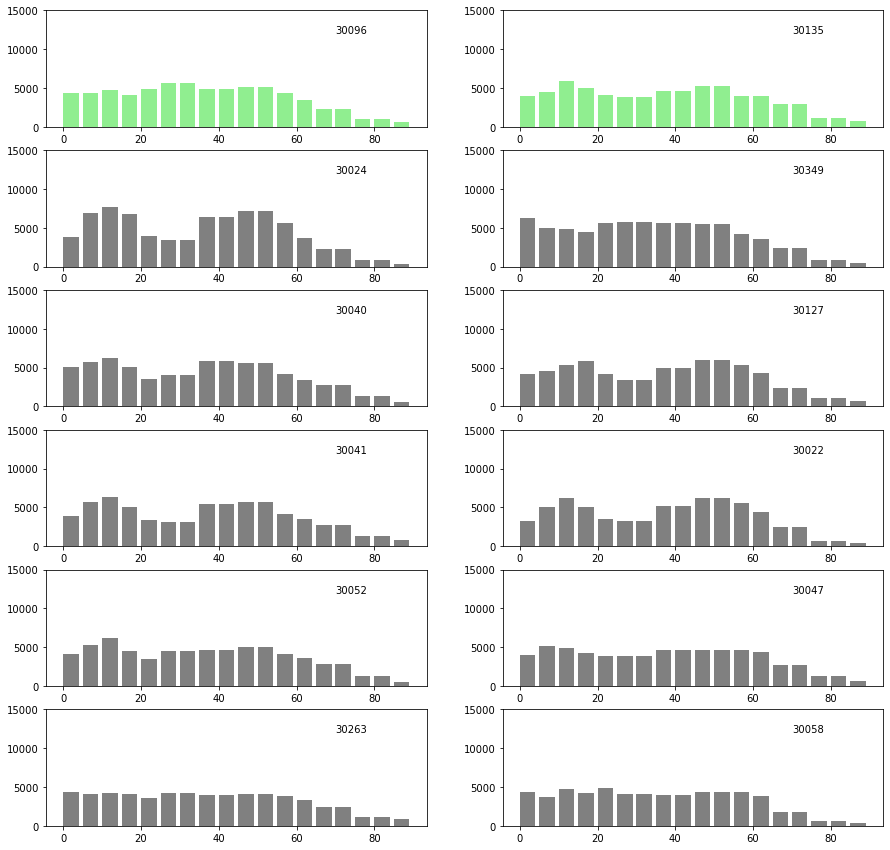

In [1328]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i == 0:
            axs[i, j].bar(x, y_age(3, n), width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 15000])
            axs[i, j].text(70, 12000, greens3.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_age_eligible(3, n), width=4, align='edge', color='grey')
            axs[i, j].set_ylim([0, 15000])
            axs[i, j].text(70, 12000, eligible3.iloc[n]['ZCTA5'])
            n += 1

#### Análise Sex Ratio

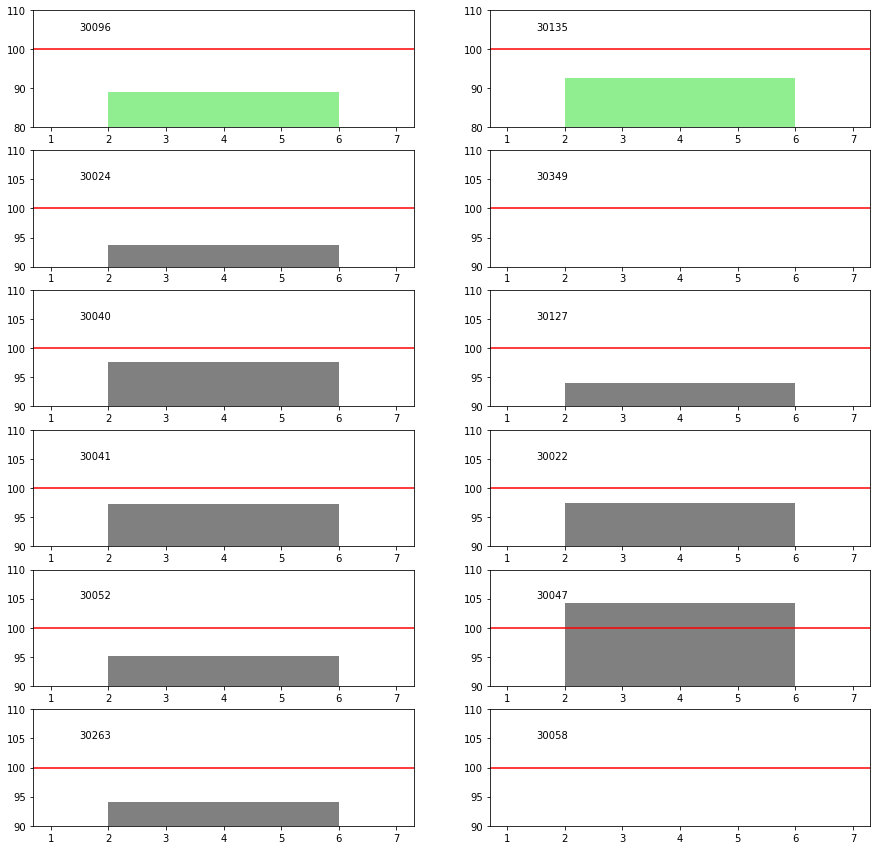

In [1331]:
x = [1, 2, 3]
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i == 0:
            axs[i, j].bar(x, [0, greens3.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='lightgreen')
            axs[i, j].set_ylim([80, 110])
            axs[i, j].text(1.5, 105, greens3.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, [0, eligible3.iloc[n]['SexRatio_Mper100F'], 0], width=4, align='edge', color='grey')
            axs[i, j].set_ylim([90, 110])
            axs[i, j].text(1.5, 105, eligible3.iloc[n]['ZCTA5'])
            axs[i, j].axhline(100, color='red')
            n += 1
  

#### Análise Econômica

<ipython-input-1290-8d58e13ff4c5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  greens = areas_zips[area_n][areas_zips[area_n]['Eligible'] == 0][areas_zips[area_n]['Green_Cluster'] == 1]


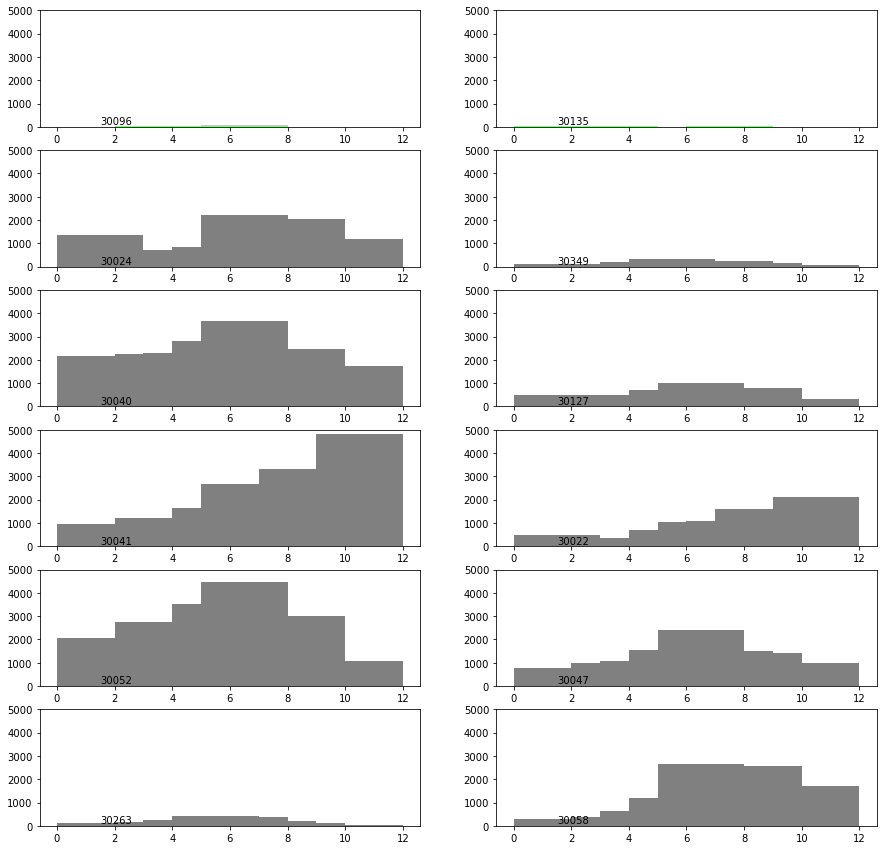

In [1330]:
x = range(10)
I, J = (6, 2)
fig, axs = plt.subplots(I, J, figsize=(15,15))

n = 0
for i in range(I):
    for j in range(J):
        if i == 0:
            axs[i, j].bar(x, y_econ(3, n), width=3, align='edge', color='lightgreen')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, greens3.iloc[n]['ZCTA5'])
            n += 1
            if i == 1: 
                n = 0
        else:
            axs[i, j].bar(x, y_econ_eligible(3, n), width=3, align='edge', color='grey')
            axs[i, j].set_ylim([0, 5000])
            axs[i, j].text(1.5, 105, eligible3.iloc[n]['ZCTA5'])
            n += 1
  

# Escolha Final

Foi escolhido um laboratório de cada área, com exceção da àrea 3.
Esta escolha se deu porque:
(1) Se trata da área com menor proporção de ZCTAs verdes em relação ao restante (indicando maior
dificuldade de uma nova instalação ser bem sucedida)
(2) Aparentemente faltam infomrações acerca de Households nesta área, enquanto as outras áreas
possuem infomrações mais completas que permitem escolhas mais certeiras

O método escolhido foi o seguinte:
Como população total se mostrou o parâmetro que melhor se associa com altos lucros, foram selecionados,
para cada área, os zipcodes com maior população. Dentre eles, foram eliminados aqueles que tivessem 
TotalHouseholds menor do que 1000. 
Para cada área em específico, foram obtidos gráficos que revelavam características dos zipcodes onde
algum laboratório obteve muito sucesso. Em seguida, os dados dos zipcodes elegíveis para a abertuda
de novos laboratórios foram comparados com os dados dos zipcodes onde já há sucesso. 
Os zipcodes elegíveis que distoassem demasiadamente dos zipcodes de sucesso foram descartados da escolha,
restando, assim, um zipcode ótimo por área (sendo este o de maior população que mais se assemelha aos
zipcodes onde o sucesso já é comprovado).

Os zipcodes para abertura de novos laboratórios são:
#### 98032
#### 94544
#### 19702

In [1351]:
lat = []
lat.append(df_econ_data_uni[df_econ_data_uni['ZCTA5'] == 98032]['Latitude'].sum())
lat.append(df_econ_data_uni[df_econ_data_uni['ZCTA5'] == 94544]['Latitude'].sum())
lat.append(df_econ_data_uni[df_econ_data_uni['ZCTA5'] == 19702]['Latitude'].sum())

long = []
long.append(df_econ_data_uni[df_econ_data_uni['ZCTA5'] == 98032]['Longitude'].sum())
long.append(df_econ_data_uni[df_econ_data_uni['ZCTA5'] == 94544]['Longitude'].sum())
long.append(df_econ_data_uni[df_econ_data_uni['ZCTA5'] == 19702]['Longitude'].sum())

No handles with labels found to put in legend.


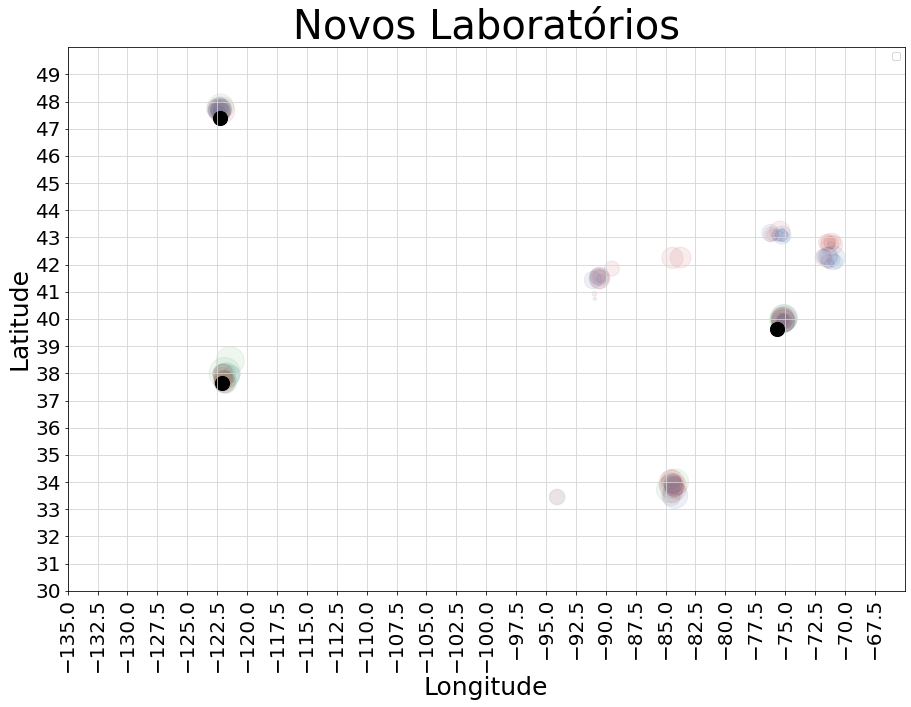

In [1361]:
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,10))
x = 'Longitude'
y = 'Latitude'
plt.scatter(df[x], df[y], c= colors, s=df['Total_Population_of_ZCTA']/100, alpha=0.1)
plt.scatter(long, lat, c= 'black', s=200, alpha=1)
#plt.scatter(df_green[x], df_green[y], c= 'green', s=df_green['Total_Population_of_ZCTA']/100, alpha=0.2)
plt.xlabel(x, size='25')
plt.ylabel(y, size='25')
plt.xticks(np.arange(-135, -65, step=2.5), size='20', rotation='vertical')
plt.yticks(np.arange(30, 50, step=1), size='20')
plt.xlim([-135, -65])
plt.ylim([30, 50])
plt.grid(c='lightgrey')
plt.title('Novos Laboratórios', fontsize='40')

plt.legend(loc='upper right')
plt.show()